# # Model: Support Vector Machines (SVMs)

### Author: Ehsan Gharib-Nezhad



In [16]:
from myfunctions import *

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import RandomOverSampler


In [17]:
df = pd.read_csv('../datasets/text_processed_all_posts_combined_imbalanced.csv',index_col=0)
is_balanced = False # set True is the dataset is balanced!!! 

In [18]:
df['is_Covid19positive'].value_counts()

1    30764
0     2341
Name: is_Covid19positive, dtype: int64

In [31]:
df[df['is_Covid19positive']==0][['selftext','is_Covid19positive']].head(30)

selftext  \
30764  Anyone in this group should know to buy now if you haven't, but for the sake of reinforcement - buy now if you haven't!  I took my under 10 aged child to Walmart today and picked up some more to add, and it is a night and day difference from 3 days ago.  Toilet paper gone.  Paper towels gone.  Lysol, down to 4 bottles.  Hand sanitizer and alcohol, gone.  Bleach was available but only a few rem...   
30765                                                                                                                                                                                                                                                       Amazon is running low on cat and dog food, my normals are sold out. I feel bad for the delivery guy dropping my shit off, almost 300lbs of food and liter.   
30766  Because you just can't find it in stores any more...\n\n [http://www.utahpreppers.com/2009/04/pandemic-preparedness-diy-sanitization/](http://www.utahpreppers.com/2009/04/pandemic-preparedness-diy-sanitization/) \n\n* 5 c 91% isopropyl alcohol\n* 2 c aloe vera gel\n\nHere's another receipt with essential oils\n\n [https://www.asiaone.com/lifestyle/make-your-own-diy-hand-sanitizer](https://www....   
30767                                                                                                                                                                                                                                                                                                                                              What the hell is going on. Anyone around this area notice anything?   
30768  I see a lot of people on here buying around the same types of stuff (canned beans, rice, etc). Just remember to know how to cook each item you buy and which combination of foods will have the right nutrients for example: you can’t live off of only eating meat products. Have a good balance of foods and learn the nutrients balance. Vitamin supplements are very important because fresh produce can...   
30769                                                                                                                                                                                                                                  Had a thought on the potential work from home situation. If quarantine happens, then will internet work with a huge number of homes likely streaming Netflix, Prime, Hulu, etc?   
30770  I have a bunch of regular "dust masks" from harbor freight. They are not N95 masks, only have one elastic band, but do have a nose metal piece to adjust fit.\n\n&amp;#x200B;\n\nI'm sure they are nowhere are good as a N95 mask, but in an emergency they might have to do.\n\n&amp;#x200B;\n\nHas anyone seen any testing done to compare regular non-fit tested dust masks vs N95 masks?\n\nThe brand I ...   
30771  Where can I get a cheap wheat grinder, or is there a readily available alternative product that would do the job, if needed? I might scour some local thrift stores and see what I can hunt up. I have some long term food storage preps from before this pandemic came up, and it includes wheat berries. I'm familiar with cooking them other ways and adding them to recipes, but if I can acquire a chea...   
30772  The last thing you want if food poisoning while bugging in, and a lot of the prepper staples are ones you gotta watch out for. \n\nDried Beans - some raw soaked or undercooked beans can give you trouble. Please read up on how to avoid this. There is a toxin called Phytohaemagglutinin in raw beans that must be deactivated by being cooked at a high enough temperature. \n\nRice, pasta, potatoes -...   
30773  I went to Dollar General tonight(as I do every Saturday for the $5 off a $25 purchase digital coupon), and I was looking for stuff to reach $25 that I might need. They had lots of decent deals and nothing was out of stock. \n\nHand Sanitizer? Yep, all sizes in stock. 30 ounce Germx for $4\n

### Set up X and Y

In [19]:
X = df['token']
y = df['is_Covid19positive']

In [20]:
#check baseline:

y.value_counts(normalize = True)

1    0.929286
0    0.070714
Name: is_Covid19positive, dtype: float64

# train test split

In [21]:
# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    random_state=42)

In [22]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(1    0.929273
 0    0.070727
 Name: is_Covid19positive, dtype: float64,
 1    0.929322
 0    0.070678
 Name: is_Covid19positive, dtype: float64)

## CountVectorizer
---

The easiest way for us to convert text data into a structured, numeric `X` dataframe is to use `CountVectorizer`.

- **Count**: Count up how many times a token is observed in a given document.
- **Vectorizer**: Create a column (also known as a vector) that stores those counts.

![](./images/countvectorizer2.png)

In [23]:
cvec = CountVectorizer()

In [24]:
Xcv_train = cvec.fit_transform(X_train)
Xcv_test = cvec.transform(X_test)

# ======================================================
## For imbalanced case

In [11]:
ros = RandomOverSampler()

Xcv_train , y_train = ros.fit_resample(Xcv_train, y_train)

# modeling

In [12]:
svc = SVC()

In [13]:
svc.fit(Xcv_train, y_train)

SVC()

Score on training set: 0.9398648648648649
Score on testing set: 0.8974358974358975
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       586
           1       0.95      0.86      0.90       740

    accuracy                           0.90      1326
   macro avg       0.90      0.90      0.90      1326
weighted avg       0.90      0.90      0.90      1326



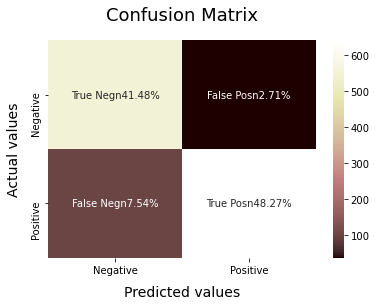

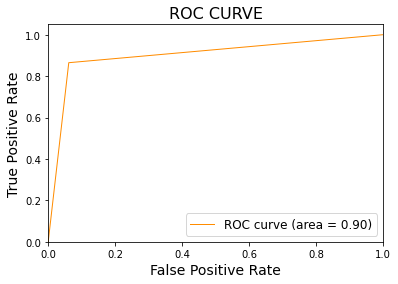

In [14]:
# Evaluate Model
model_Evaluate(svc, Xcv_train, Xcv_test, y_train, y_test)

In [38]:
save_model_Evaluate_values(svc, Xcv_train, Xcv_test, y_train, y_test,  
                             model_name='Support Vector',
                             balanced= is_balanced)

(   score   metric           model balanced
 0   0.98  R_train  Support Vector       no
 1   0.96   R_test  Support Vector       no,
    is_pandemicPreps  is_covid19positive     metric           model balanced
 0              0.67                0.99  precision  Support Vector       no
 1              0.85                0.97     recall  Support Vector       no
 2              0.75                0.98     fscore  Support Vector       no
 3            585.00             7692.00    support  Support Vector       no,
    score     metric           model balanced
 0   0.06   True Neg  Support Vector       no
 1   0.01  False Pos  Support Vector       no
 2   0.03  False Neg  Support Vector       no
 3   0.90   True Pos  Support Vector       no)

# Feature Count

In [25]:
#create a dataframe for our X_train_cv to use later:

df_X_train = pd.DataFrame(Xcv_train.todense(), columns=cvec.get_feature_names())
df_X_train

aa  aaa  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa  aaaaaachooooooo  \
0       0    0                                         0                0   
1       0    0                                         0                0   
2       0    0                                         0                0   
3       0    0                                         0                0   
4       0    0                                         0                0   
...    ..  ...                                       ...              ...   
24823   0    0                                         0                0   
24824   0    0                                         0                0   
24825   0    0                                         0                0   
24826   0    0                                         0                0   
24827   0    0                                         0                0   

       aaaand  aaargh  ab  aback  abain  abandon  ...  zpak  zucchini  \
0           0       0   0      0      0        0  ...     0         0   
1           0       0   0      0      0        0  ...     0         0   
2           0       0   0      0      0        0  ...     0         0   
3           0       0   0      0      0        0  ...     0         0   
4           0       0   0      0      0        0  ...     0         0   
...       ...     ...  ..    ...    ...      ...  ...   ...       ...   
24823       0       0   0      0      0        0  ...     0         0   
24824       0       0   0      0      0        0  ...     0         0   
24825       0       0   0      0      0        0  ...     0         0   
24826       0       0   0      0      0        0  ...     0         0   
24827       0       0   0      0      0        0  ...     0         0   

       zuchinni  zuckersaid  zuid  zurich  zybio  zyrtec  zz  zzzquil  
0             0           0     0       0      0       0   0        0  
1             0           0     0       0      0       0   0        0  
2             0           0     0       0      0       0   0        0  
3             0           0     0       0      0       0   0        0  
4             0           0     0       0      0       0   0        0  
...         ...         ...   ...     ...    ...     ...  ..      ...  
24823         0           0     0       0      0       0   0        0  
24824         0           0     0       0      0       0   0        0  
24825         0           0     0       0      0       0   0        0  
24826         0           0     0       0      0       0   0        0  
24827         0           0     0       0      0       0   0        0  

[24828 rows x 19772 columns]

In [40]:
# f = {'Feature Name':df_X_train.columns,'Feature Count':svc.coef_[1]}
# mnb_fi = pd.DataFrame(f)

# mnb_fi.sort_values(by=['Feature Count'], ascending = False).head(20)

In [41]:
# plt.figure( figsize=(10,8))
# sns.barplot(x='Feature Count',y='Feature Name', 
#             data=mnb_fi.sort_values(by=['Feature Count'], ascending = False).iloc[0:20],
#            palette='coolwarm')
# plt.xlabel('Feature Count ',fontsize=14)
# plt.ylabel('Feature Name', fontsize = 14)
# plt.tick_params('both', labelsize = 13)

# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# GridSearchCV

### Hyperparameters of SVMs
SVMs will have two main hyperparameters: `C` and `kernel`.

#### Parameter: `C`
`C` controls how much we regularize the boundary that is fit between classes.
- **If `C` is small**: We regularize substantially, leading to a less perfect classification of our training data.
- **If `C` is large**: We do not regularize much, leading to a more perfect classification of our training data.

(THREAD) As we increase `C`, what happens to our bias-variance tradeoff?

#### Parameter: `kernel`
There are several options:
* `linear`, `rbf`, `polynomial`, `sigmoid`, or something custom

**Which do we use?**
- **Quick answer**: As long as it's not the linear kernel, it actually matters surprisingly little!
- **Lazy answer**: Use the RBF kernel, as it's usually best (or no different from other options).
- **Better answer**: It's a model parameter that you're free to gridsearch over!

In [42]:
params = {
    'C' : [0.1,1,10,100],
    'kernel' : [ 'rbf'],
    'gamma'  : ['scale', 'auto']
    
}

In [43]:
# Instantiate GridSearchCV.

gs = GridSearchCV( SVC(), params, cv = 5 )

In [ ]:
gs.fit(Xcv_train, y_train )

In [ ]:
gs.best_params_

In [ ]:
# Evaluate model.
model_Evaluate(gs, Xcv_train, Xcv_test, y_train, y_test)

In [ ]:
save_model_Evaluate_values(gs, Xcv_train, Xcv_test, y_train, y_test,  
                             model_name='Support Vector - GridSearchCV',
                            balanced= is_balanced)